Each year, Stack Overflow surveys its users, who are primarily software developers, about themselves, how they use Stack Overflow, their work, and the development tools they use. We'll look at a subset of the survey responses from users who identified as Data Scientists.



> Let's hypothesize that the mean annual compensation of the population of data scientists is 110,000 dollars.




In [ ]:
import pandas as pd


# Load the Feather file
# feather_file_path = 'path/to/your/feather/file.feather'
df = pd.read_feather('stack_overflow.feather')

# Save as CSV file
df.to_csv('stack_overflow.csv', index=False)



FileNotFoundError: [Errno 2] No such file or directory: 'stack_overflow.feather'

In [ ]:
import pandas as pd

df1=pd.read_csv('stack_overflow.csv')

In [ ]:
df1.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,NaN,NaN,NaN,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


In [ ]:
df1.shape

(2261, 63)

In [ ]:
df1.columns

Index(['respondent', 'main_branch', 'hobbyist', 'age', 'age_1st_code',
       'age_first_code_cut', 'comp_freq', 'comp_total', 'converted_comp',
       'country', 'currency_desc', 'currency_symbol',
       'database_desire_next_year', 'database_worked_with', 'dev_type',
       'ed_level', 'employment', 'ethnicity', 'gender', 'job_factors',
       'job_sat', 'job_seek', 'language_desire_next_year',
       'language_worked_with', 'misc_tech_desire_next_year',
       'misc_tech_worked_with', 'new_collab_tools_desire_next_year',
       'new_collab_tools_worked_with', 'new_dev_ops', 'new_dev_ops_impt',
       'new_ed_impt', 'new_job_hunt', 'new_job_hunt_research', 'new_learn',
       'new_off_topic', 'new_onboard_good', 'new_other_comms', 'new_overtime',
       'new_purchase_research', 'purple_link', 'newso_sites', 'new_stuck',
       'op_sys', 'org_size', 'platform_desire_next_year',
       'platform_worked_with', 'purchase_what', 'sexuality', 'so_account',
       'so_comm', 'so_part_freq'

In [ ]:
# point estimate = sample statistic - mean of annual compensation from sample
mean_comp_sample=df1['converted_comp'].mean()
mean_comp_sample

119574.71738168952

In [ ]:
# Generating a Bootstrap Distribution
import numpy as np
boot_1=[]
for i in range(5000):
  boot_1.append(
  np.mean(
       df1.sample(frac=1,replace=True)['converted_comp']

  )
  )


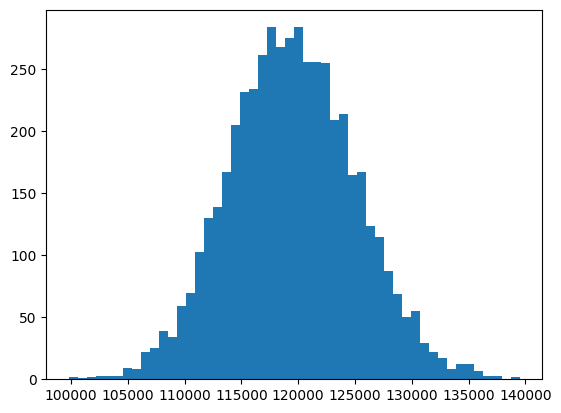

In [ ]:
import matplotlib.pyplot as plt
plt.hist(boot_1,bins=50)
plt.show()

In [ ]:
# the above graph shows the data is roughly normally distributed
# the data has different ranges/units and needs to be standardized
# for standardization we use z score method

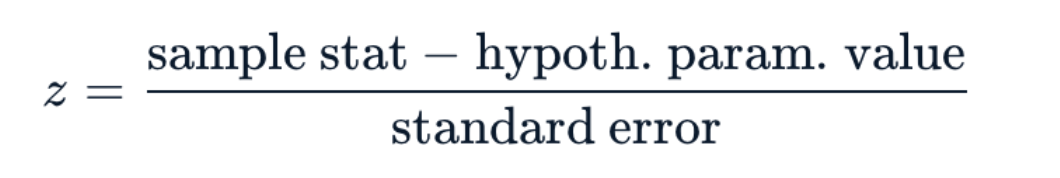

In [ ]:
# calculating standard error

std_error=np.std(boot_1)
std_error

5586.169485652893

In [ ]:
# sample statistic
mean_comp_sample

119574.71738168952

In [ ]:
# hypothetical parameter value or expected value
mean_comp_hyp=110000
mean_comp_hyp

110000

In [ ]:
z_score=(mean_comp_sample - mean_comp_hyp) / std_error
z_score

1.7140040964171466

# **Another Problem**



> age_first_code_cut determines whether they started programming as adult or child, >14 is adult and less is child



In [ ]:
# Claim: 35% Software developers started programming as children
# Is this true?
# Can we find the answer from this dataset?
# Is there evidence that a greater proportion of Data Scientists started programming as children

In [ ]:
# H0 (null_hypothesis) - Proportion of Data Scientists thta started programming as children =35%
# H0 follows the claim

In [ ]:
# HA (Alternate hypothesis) - Proportion of Data Scientists thta started programming as children >35%
# HA challenges the claim

In [ ]:
# only 1 H0 or HA can be true

In [ ]:
# We try to give enough evidence to reject null hypothesis so as to prove HA as true
# 2 possible outcomes - reject null hypothesis or fail to reject null hypothesis
# reject null hypothesis means HA is true
# fail to reject null hypothesis means HA is false and the claim is true

In [ ]:
# HA > H0 therefore we need to do a right tailed test on the null distribution
# assuming H0 is true (which is our initial point of starting hypoteses testing)

In [ ]:
# p values measure strenght of support for H0 to be true
# Large p value means large support for H0
# Statistic likely not in the tail of distribution rather somewhere in between
# p values range between 0 and 1 since they are probability
# small p values means there is a strong evidence to reject H0

In [ ]:
# WE NEED Z SCORE TO CALCULATE P VALUE

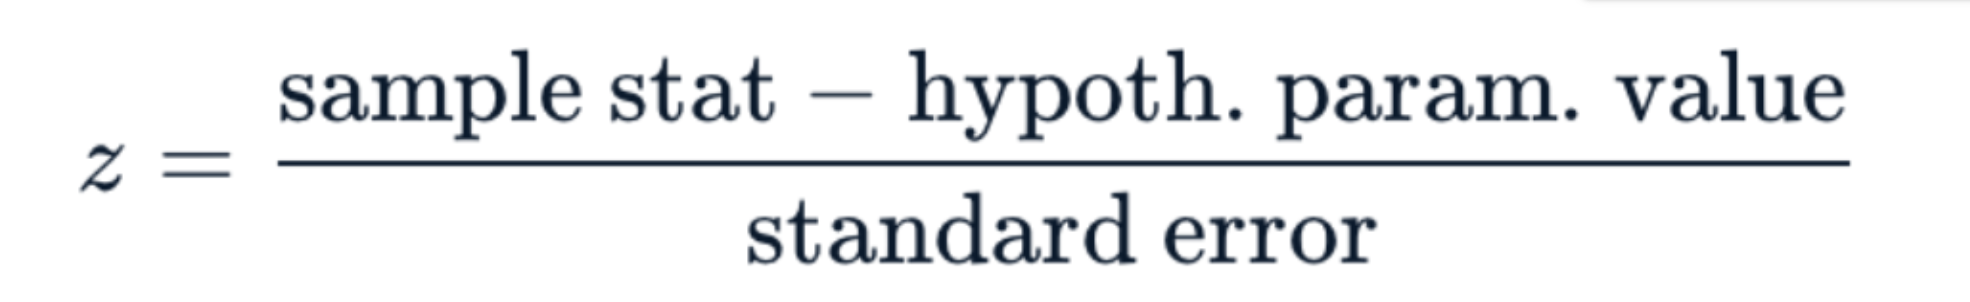

In [ ]:
prop_child_mean_sample=(df1['age_first_code_cut']=='child').mean()
prop_child_mean_sample #sample statistic

0.39141972578505085

In [ ]:
prop_child_mean_hyp=0.35
prop_child_mean_hyp #hypothetical statistic

0.35

In [ ]:
# To calculate standard error - we need bootstrap distribution

In [ ]:
# bootstrap distribution
import numpy as np
first_code_boot_distn=[]
for i in range(10000):
  first_code_boot_distn.append(
      np.mean(
          df1.sample(frac=1,replace=True)['age_first_code_cut']=='child'
      )
  )

(array([  1.,   0.,   1.,   4.,   0.,   2.,   3.,   2.,  14.,  10.,  28.,
         38.,  68.,  70., 109., 158., 212., 243., 230., 380., 440., 519.,
        403., 633., 641., 637., 715., 472., 630., 591., 527., 372., 432.,
        344., 291., 233., 105., 143.,  95.,  68.,  38.,  34.,  16.,  17.,
          9.,   7.,   6.,   4.,   2.,   3.]),
 array([0.34763379, 0.34930562, 0.35097744, 0.35264927, 0.3543211 ,
        0.35599292, 0.35766475, 0.35933658, 0.3610084 , 0.36268023,
        0.36435206, 0.36602388, 0.36769571, 0.36936754, 0.37103936,
        0.37271119, 0.37438302, 0.37605484, 0.37772667, 0.3793985 ,
        0.38107032, 0.38274215, 0.38441398, 0.3860858 , 0.38775763,
        0.38942946, 0.39110128, 0.39277311, 0.39444494, 0.39611676,
        0.39778859, 0.39946042, 0.40113224, 0.40280407, 0.4044759 ,
        0.40614772, 0.40781955, 0.40949138, 0.4111632 , 0.41283503,
        0.41450686, 0.41617868, 0.41785051, 0.41952234, 0.42119416,
        0.42286599, 0.42453782, 0.42620964, 0.

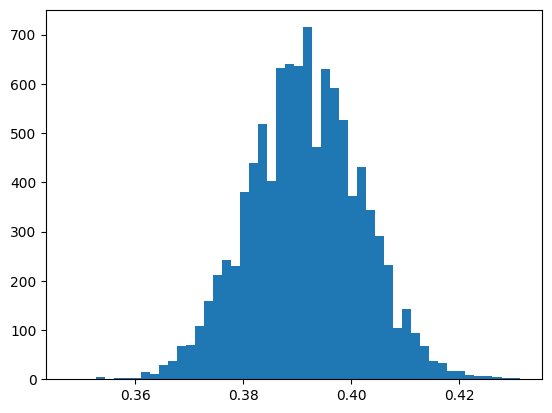

In [ ]:
import matplotlib.pyplot as plt
plt.hist(first_code_boot_distn,bins=50)

In [ ]:
std_error_1=np.std(first_code_boot_distn,ddof=1)
std_error_1

0.010455593138611916

In [ ]:
z_score_1=(prop_child_mean_sample-prop_child_mean_hyp)/std_error_1
z_score_1

3.961489820418716

In [ ]:
# Since we are doing a right tailed test
# we pass z score to normal CDF with 1-norm.cdf(z,loc=0,scale=1)
# loc is mean
# scale is std

In [ ]:
# Set alpha beforehand
alpha=0.05

In [ ]:
from scipy.stats import norm
p_value=1-norm.cdf(z_score_1,loc=0,scale=1)
p_value

3.7241779056174096e-05

In [ ]:
p_value<=alpha

True

In [ ]:
# Since p_value<=alpha, we reject H0. We have enough evidence that HA (Proportion of Data Scientists thta started programming as children >35% )
# is true.

In [ ]:
# We choose a confidence interval of 1-alpha
# which is 95%


In [ ]:
# Further to our analysis, we can further check the interquartile range for the bootstrap distribution of age_first_code_cut
# And check if the values lie above 35% which again further proves that we can reject H0



In [ ]:
import numpy as np

lower=np.quantile(first_code_boot_distn,0.25)
upper=np.quantile(first_code_boot_distn,0.75)
print(lower,upper)

0.38434321096859797 0.39849624060150374


In [ ]:
# This interval provides a range of plausible values for the population proportion of data scientists that programmed as children

lower1=np.quantile(first_code_boot_distn,0.025)
upper1=np.quantile(first_code_boot_distn,0.975)
print(lower1,upper1)

0.3710747456877488 0.4117647058823529


# Do the users who started coding as child are better compensated as compared to who started coding as adult?

In [ ]:
# H0 = The mean compensation is same regarldless whether they started coding as child or adult
# HA = The mean compensation for child coder > mean compensation for adult coder

In [ ]:
# In H0, mean compensation for child coder - mean compensation for adult coder = 0

In [ ]:
# In HA, mean compensation for child coder - mean compensation for adult coder > 0

In [ ]:
# there are two sample cases here, one being child related and other adult related

In [ ]:
# So, instead of using z score as test statistic, we will use a t test

In [ ]:
# Deciding on alpha =0.1

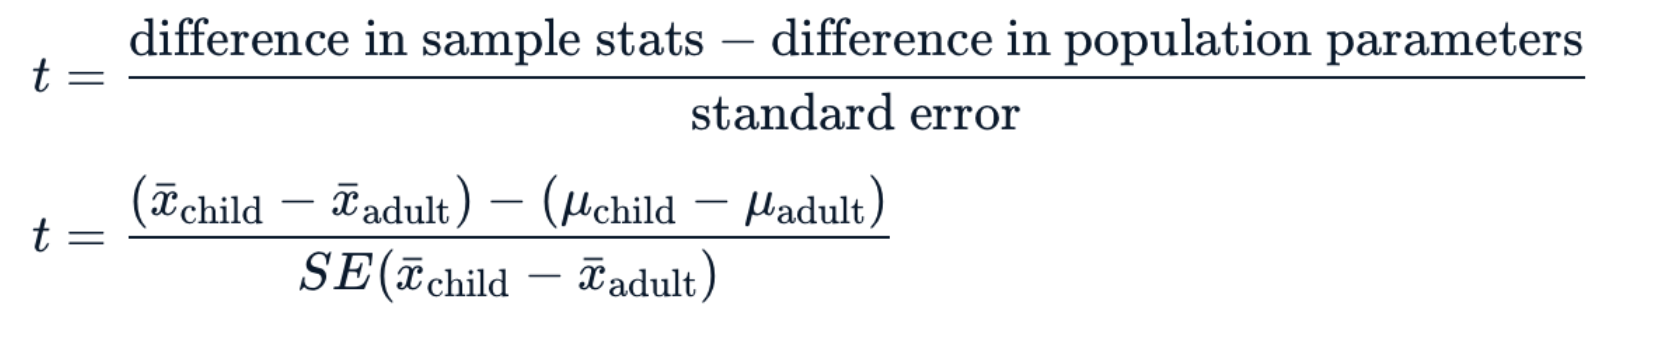

In [ ]:
xbar_sample_mean=df1.groupby('age_first_code_cut')['converted_comp'].mean()
xbar_sample_mean

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [ ]:
xbar_sample_mean['adult']

111313.31104651163

In [ ]:
s=df1.groupby('age_first_code_cut')['converted_comp'].std()
s
# s is std dev

age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64

In [ ]:
n=df1.groupby('age_first_code_cut')['converted_comp'].count()
n
# n is sample size or number of observations

age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64

In [ ]:
# for H0

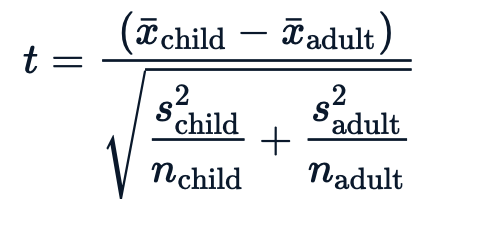

In [ ]:
import numpy as np
numerator = xbar_sample_mean['child'] - xbar_sample_mean['adult']
denominator = np.sqrt(s['child'] ** 2 / n['child'] + s['adult'] ** 2 / n['adult'])
t_stat = numerator / denominator
t_stat

1.8699313316221844

In [ ]:
# to caluclate the p value, we need the degrees of freedom

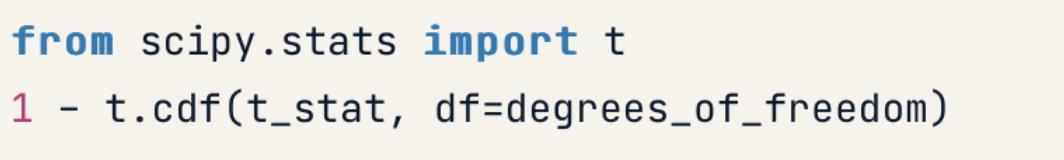

In [ ]:
degrees_of_freedom= n['child'] + n['adult'] - 2
degrees_of_freedom

2259

In [ ]:
from scipy.stats import t
p_val=1-t.cdf(t_stat, df=degrees_of_freedom)
p_val

0.030811302165157595

In [ ]:
alpha_1=0.1

In [ ]:
p_val<alpha_1

True

In [ ]:
# Therefore we reject H0 and HA is true. The datascientists who started programming as children earn more